# Chameleons
In einem Zoo leben sieben Chamäleons in einem grossen Terrarium. Und zwar zwei rote, vier gelbe und ein violettes.
Diese Chamäleons haben eine spezielle Eigenschaft: Immer, wenn sich zwei Chamäleons verschiedener Farbe begegnen, nehmen beide die dritte Farbe an.
Wenn sich also ein rotes und ein gelbes Chamäleon begegnen, werden beide violett.

Frage: Kann es passieren, dass irgendwann alle Chamäleons die gleiche Farbe haben?

- Nein, das kann nicht passieren.
- Ja, das kann sein. Alle Chamäleons werden rot.
- Ja, das kann sein. Alle Chamäleons werden gelb.
- Ja, das kann sein. Alle Chamäleons werden violett.

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

## States
Are represented as tripples $(\#red, \#yellow, \#purple)$ e.g. $(2, 4, 1)$

In [96]:
n_cham = 7
#init = (2,4,1)

g7 = nx.DiGraph()
g7.add_nodes_from((i, j, n_cham-i-j) for i in range(n_cham+1) for j in range(n_cham+1-i))

## Dynamics
On tripples with all entries nonzero, transitions to another state are possible by adding $(-1, -1, 2)$ or a permutation thereof.
In tripples with one zero entry only one transition is possible, e.g. $(3, 0, 4) + (-1, 2, -1) \mapsto (2, 2, 3)$.
Tripples with two zeros are nonochrome and have no transitions

In [97]:
for i, j, k in g7.nodes:
    if i > 0 and j > 0:
        g7.add_edge((i,j,k), (i-1,j-1,k+2))
    if i > 0 and k > 0:
        g7.add_edge((i,j,k), (i-1,j+2,k-1))
    if j > 0 and k > 0:
        g7.add_edge((i,j,k), (i+2,j-1,k-1))

3

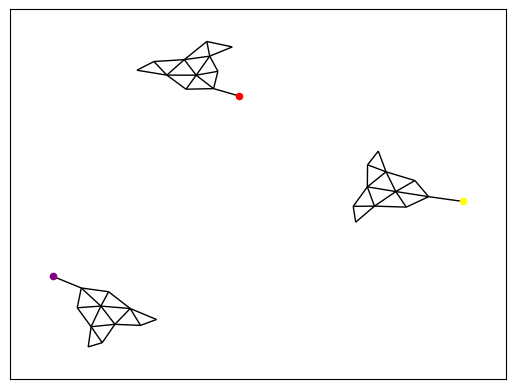

In [98]:
pos = nx.spring_layout(g7.to_undirected(), seed=99)  # positions for all nodes
options = {'node_size': 20}

# nodes:
#nx.draw_networkx_nodes(g7, pos, **options)
for i,j in [
    #(init, 'black'), 
    ((n_cham,0,0), 'red'),
    ((0,n_cham,0), 'yellow'),
    ((0,0,n_cham), 'purple')
    ]:
    nx.draw_networkx_nodes(g7, pos, nodelist=[i], node_color=j, **options)

# edges:
_= nx.draw_networkx_edges(g7.to_undirected(), pos)
nx.number_weakly_connected_components(g7)